In [3]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

Load DataSets And Scale Data:

Preprocess Data

In [25]:
#Load the data from directory
data=tf.keras.utils.image_dataset_from_directory('data',image_size=(150, 150),shuffle=True)

Found 8002 files belonging to 2 classes.


In [26]:
#Normalize the data
data = data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [27]:
s_iter=data.as_numpy_iterator()

In [28]:
batch=s_iter.next()

In [29]:
print(batch[0].max())
print(batch[0].min())

1.0
0.0


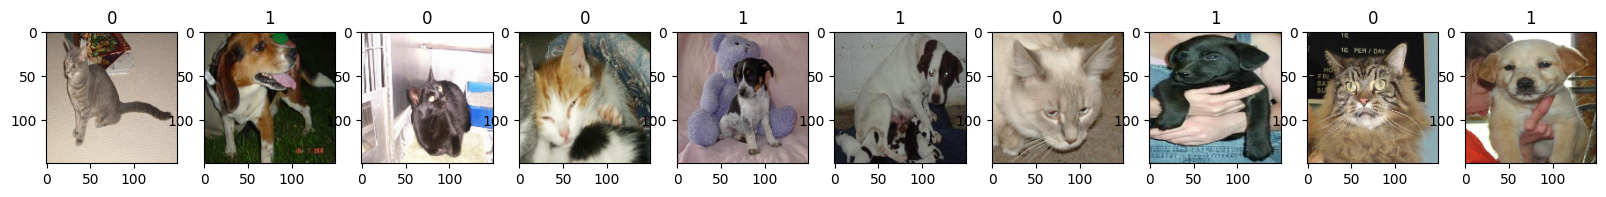

In [30]:
#Plot the data
fig, ax=plt.subplots(ncols=10,figsize=(20,20))
for idx,img in enumerate(batch[0][:10]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

1 is equal to Dog,
0 is equal to Cat

Split Data into Test and Train

In [31]:
len(data)

251

In [32]:
#Splite the data into train set,validation set and test set
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)
test_size=int(len(data)*.1)+1

In [33]:
test_size+train_size+val_size

251

In [34]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

Deep Learning Model:

In [86]:
#Learning Model (the brain)
model = Sequential(
    [
        tf.keras.layers.Input(shape=(150,150,3)),
        Conv2D(100, (3,3), 1, activation='relu'),
        MaxPooling2D(),
        Conv2D(50, (3,3), 1, activation='relu'),
        MaxPooling2D(),
        Conv2D(16, (3,3), 1, activation='relu'),
        MaxPooling2D(),
        Conv2D(32, (3,3), 1, activation='relu'),
        MaxPooling2D(),
        Dropout(0.5),
        Flatten(),
        Dense(150,activation='relu'),
        Dense(50,activation='relu'),
        Dense(1,activation='sigmoid'),

])

In [87]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

In [88]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 148, 148, 100)     2800      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 74, 74, 100)      0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 72, 72, 50)        45050     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 36, 36, 50)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 34, 34, 16)        7216      
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 17, 17, 16)     

In [89]:
logdir='logs'

In [90]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [91]:
hist=model.fit(train,epochs=30,validation_data=val,callbacks=[tensorboard_callback],batch_size=32)

Epoch 1/30
175/175 [==============================] - 114s 641ms/step - loss: 0.6922 - accuracy: 0.5245 - val_loss: 0.6803 - val_accuracy: 0.5681
Epoch 2/30
175/175 [==============================] - 133s 758ms/step - loss: 0.6593 - accuracy: 0.6116 - val_loss: 0.6759 - val_accuracy: 0.5669
Epoch 3/30
175/175 [==============================] - 133s 761ms/step - loss: 0.6266 - accuracy: 0.6521 - val_loss: 0.6117 - val_accuracy: 0.6556
Epoch 4/30
175/175 [==============================] - 136s 779ms/step - loss: 0.5896 - accuracy: 0.6909 - val_loss: 0.6038 - val_accuracy: 0.6725
Epoch 5/30
175/175 [==============================] - 128s 731ms/step - loss: 0.5618 - accuracy: 0.7064 - val_loss: 0.5811 - val_accuracy: 0.6944
Epoch 6/30
175/175 [==============================] - 129s 734ms/step - loss: 0.5323 - accuracy: 0.7341 - val_loss: 0.5308 - val_accuracy: 0.7387
Epoch 7/30
175/175 [==============================] - 131s 746ms/step - loss: 0.5019 - accuracy: 0.7563 - val_loss: 0.5431 -

In [92]:
hist.history

{'loss': [0.69218909740448,
  0.6592958569526672,
  0.6265637278556824,
  0.5895743370056152,
  0.5617966651916504,
  0.5322789549827576,
  0.5019179582595825,
  0.4837759733200073,
  0.44797438383102417,
  0.42598575353622437,
  0.39117687940597534,
  0.3536027669906616,
  0.32817086577415466,
  0.31773650646209717,
  0.2808099091053009,
  0.2525689899921417,
  0.25261515378952026,
  0.22151611745357513,
  0.21869437396526337,
  0.18480348587036133,
  0.17181868851184845,
  0.1663256585597992,
  0.16397163271903992,
  0.15587496757507324,
  0.13311880826950073,
  0.12923234701156616,
  0.12442334741353989,
  0.11644257605075836,
  0.10787347704172134,
  0.1258208155632019],
 'accuracy': [0.5244643092155457,
  0.6116071343421936,
  0.6521428823471069,
  0.6908928751945496,
  0.706428587436676,
  0.7341071367263794,
  0.7562500238418579,
  0.7632142901420593,
  0.791607141494751,
  0.7976785898208618,
  0.818928599357605,
  0.8430356979370117,
  0.8535714149475098,
  0.8617857098579407,

Plot Performance:

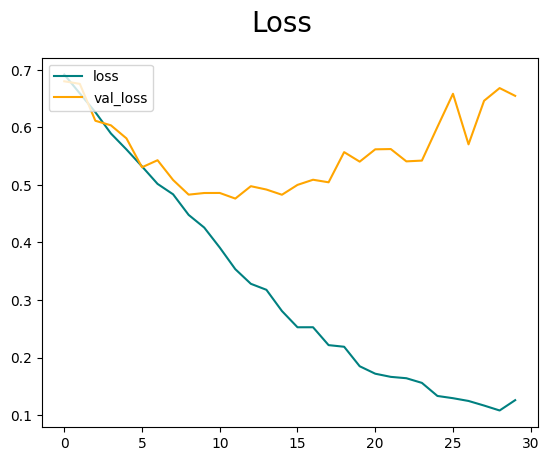

In [95]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

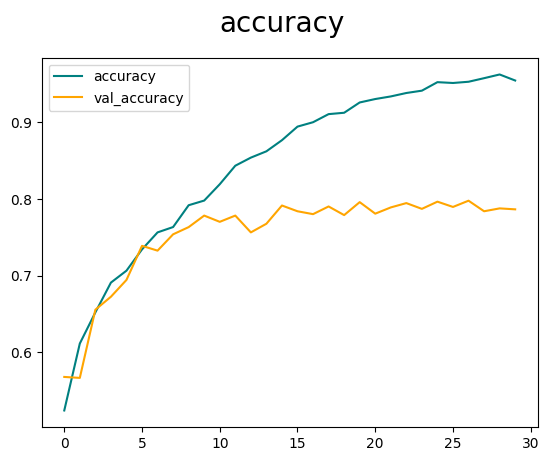

In [96]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate Performance: 

In [97]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [98]:
pre = Precision()
re= Recall()
acc = BinaryAccuracy()

In [99]:
for batch in test.as_numpy_iterator():
    x,y=batch
    yhat=model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 78ms/step


In [100]:
print(f'Precision{pre.result()},Recall{re.result()},Accuracy{acc.result()}')

Precision0.7219827771186829,Recall0.8502538204193115,Accuracy0.7655860185623169


Test:

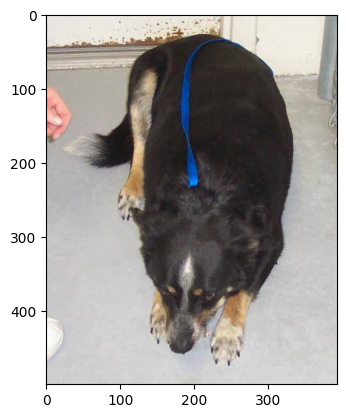

In [101]:
img=cv2.imread('test_dir/24.JPG')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

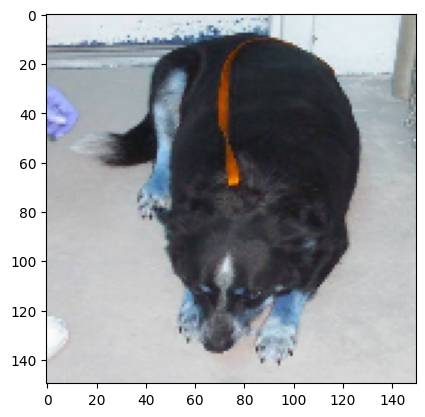

In [102]:
resize=tf.image.resize(img,(150,150))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [103]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 22ms/step


In [104]:
yhat

array([[0.9996897]], dtype=float32)

In [105]:
if yhat > 0.5:
    print('This is a DOG')
else:
    print('This is a CAT')

This is a DOG


In [106]:
model.save(os.path.join('model','CatandDogmodel.h5'))

Save The Model

In [4]:
from tensorflow.keras.models import load_model

In [5]:
from keras import models    
model = models.load_model(os.path.join('model','CatandDogmodel.h5'))

Try Out some new example:

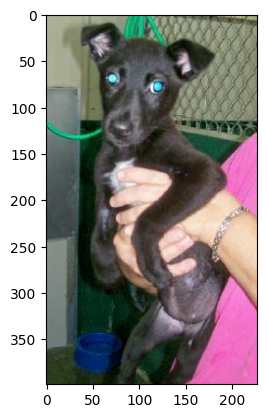

In [58]:
#You can try out some new example here
img=cv2.imread('test_dir/17.jpg') # change the numder of the .JPG
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [59]:
resize=tf.image.resize(img,(150,150))
#plt.imshow(resize.numpy().astype(int))
#plt.show()

In [60]:
y_predict=model.predict(np.expand_dims(resize/255,0))
y_predict

1/1 [==============================] - 0s 23ms/step


array([[0.99018985]], dtype=float32)

In [61]:
if y_predict > 0.5:
    print('The Class Predicted is a Dog')
else:
    print('The Class Predicted is a Cat')

The Class Predicted is a Dog
